In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

Classification
========
First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])

(100, 2)
(100,)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
[1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in two-dimensional space, with the first feature being the x-axis and the second feature being the y-axis.

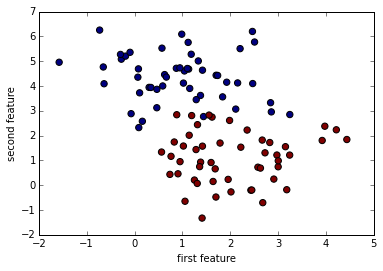

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")

As classification is a supervised task, and we are interested in how well the model generalizes, we split our data into a training set,
to built the model from, and a test-set, to evaluate how well our model performs on new data. The ``train_test_split`` function form the ``cross_validation`` module does that for us, by randomly splitting of 25% of the data for testing.
<img src="figures/train_test_split.svg" width="100%">


In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### The scikit-learn estimator API
<img src="figures/supervised_workflow.svg" width="100%">


Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a logistic regression is:

In [5]:
from sklearn.linear_model import LogisticRegression

All models in scikit-learn have a very consistent interface.
First, we instantiate the estimator object.

In [6]:
classifier = LogisticRegression()

In [7]:
X_train.shape

(75, 2)

In [8]:
y_train.shape

(75,)

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [9]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [10]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [11]:
print(prediction)
print(y_test)

[1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1]
[1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [12]:
np.mean(prediction == y_test)

0.92000000000000004

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [13]:
classifier.score(X_test, y_test)

0.92000000000000004

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [14]:
classifier.score(X_train, y_train)

0.92000000000000004

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

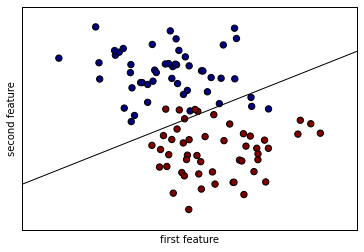

In [15]:
from figures import plot_2d_separator

plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)

**Estimated parameters**: All the estimated parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [16]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.02974678 -1.43697237]]
[ 2.09263249]


Another classifier: K Nearest Neighbors
------------------------------------------------
Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for ``LogisticRegression above``.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

We fit the model with out training data

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

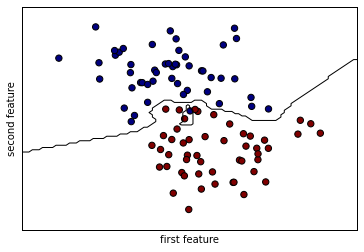

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)

In [ ]:
knn.score(X_test, y_test)

Exercise
=========
Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.